In [2]:
from google.colab import files
uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset (1).csv


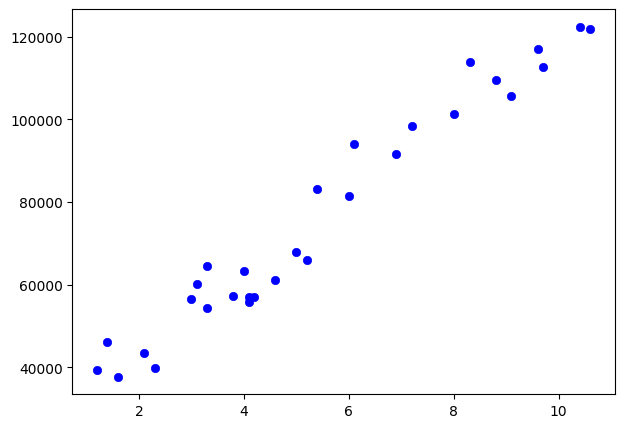

In [32]:
import csv
import matplotlib.pyplot as plt

filename = '/Salary_dataset.csv'

years_experience = []
salaries = []

with open(filename, mode='r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    for row in csv_reader:
        years_experience.append(float(row[1]))
        salaries.append(float(row[2]))

plt.figure(figsize=(7, 5))
plt.scatter(years_experience, salaries, color='blue', edgecolors='blue', linewidth=0.5)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.grid(False)
plt.show()


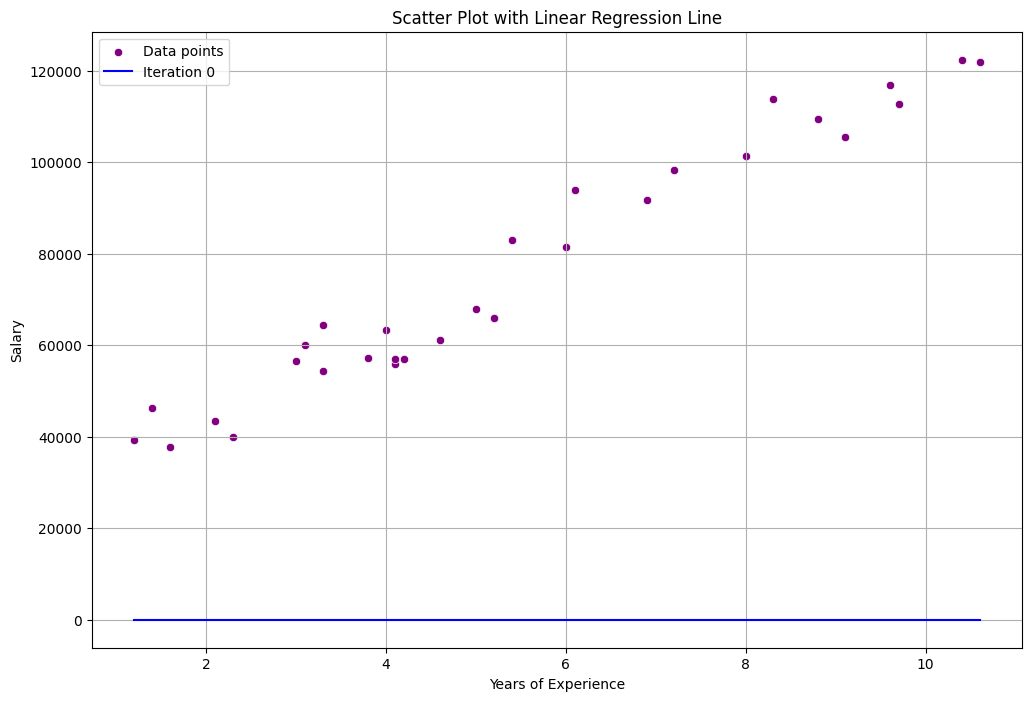

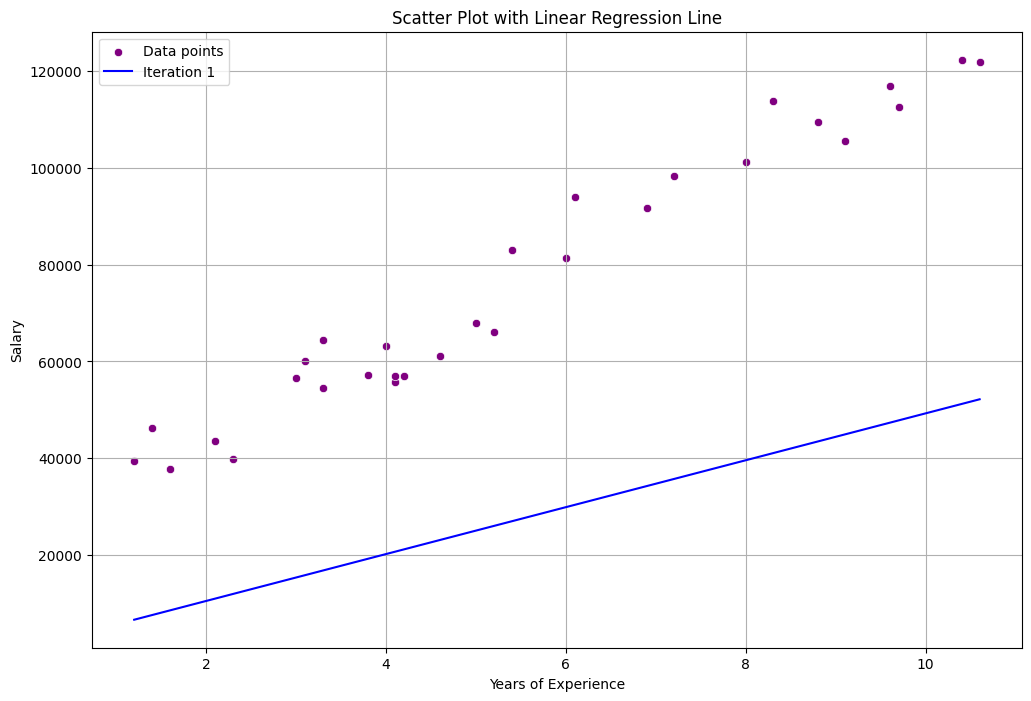

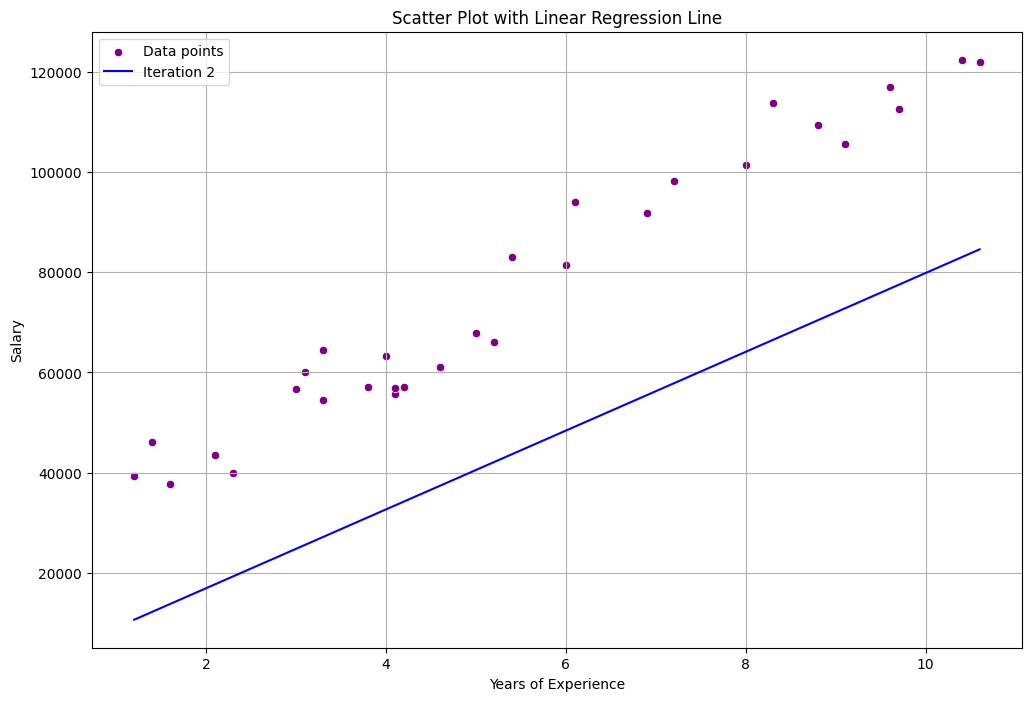

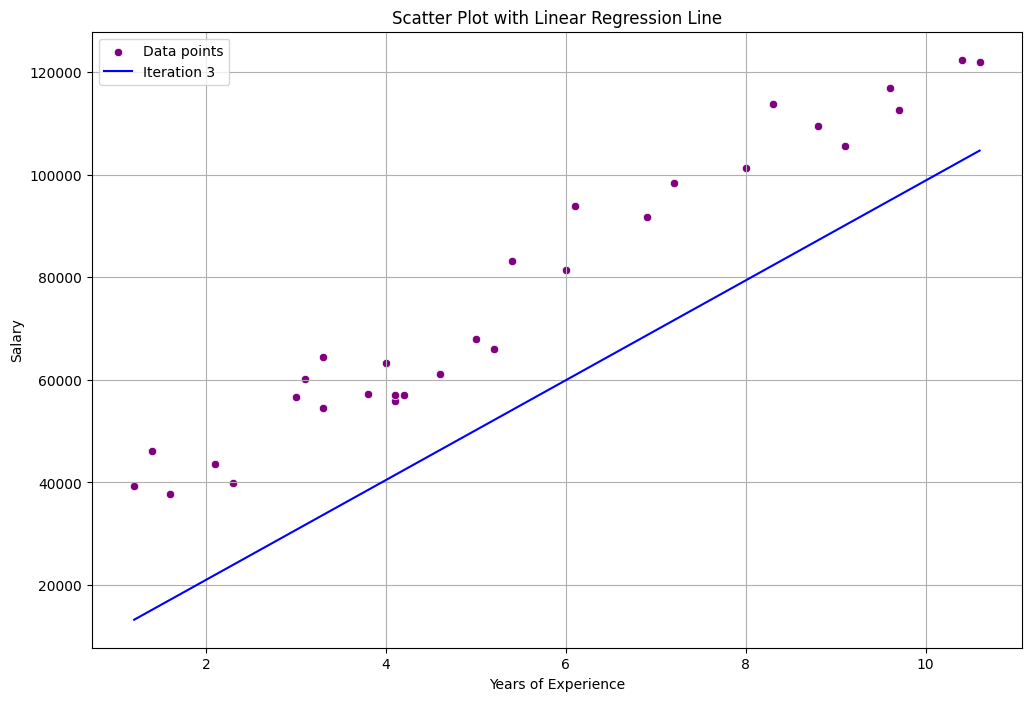

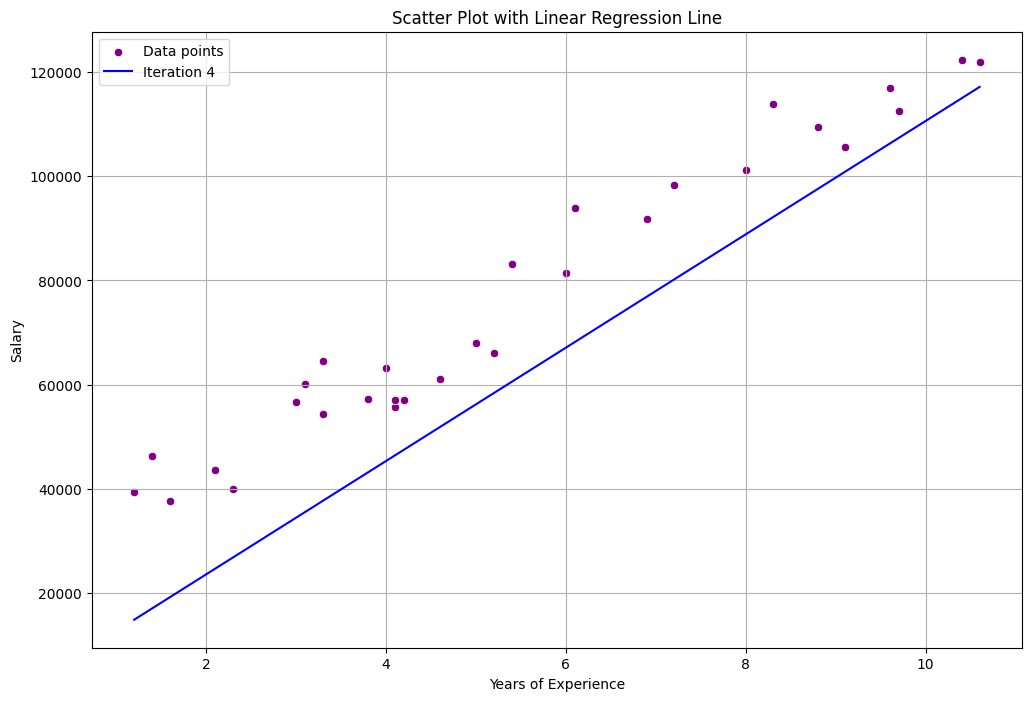

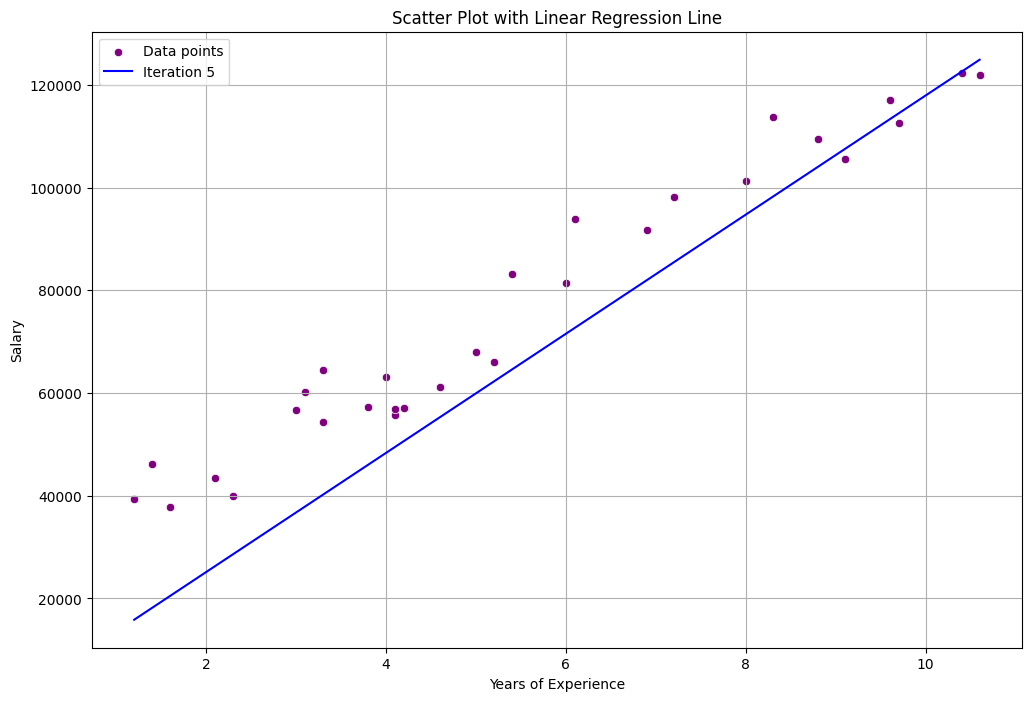

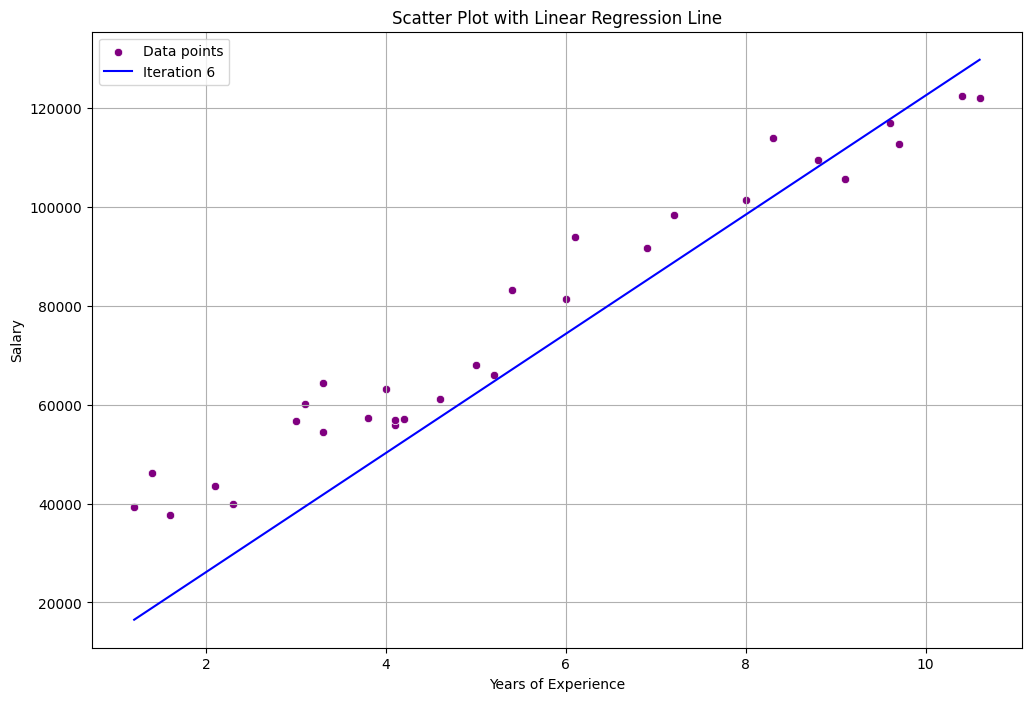

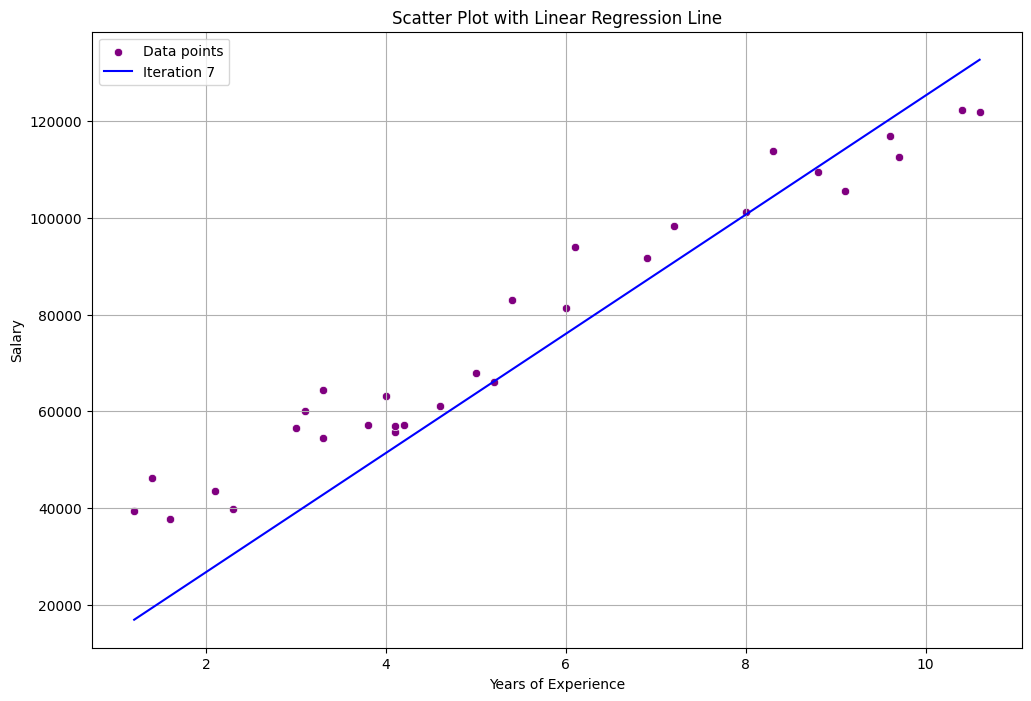

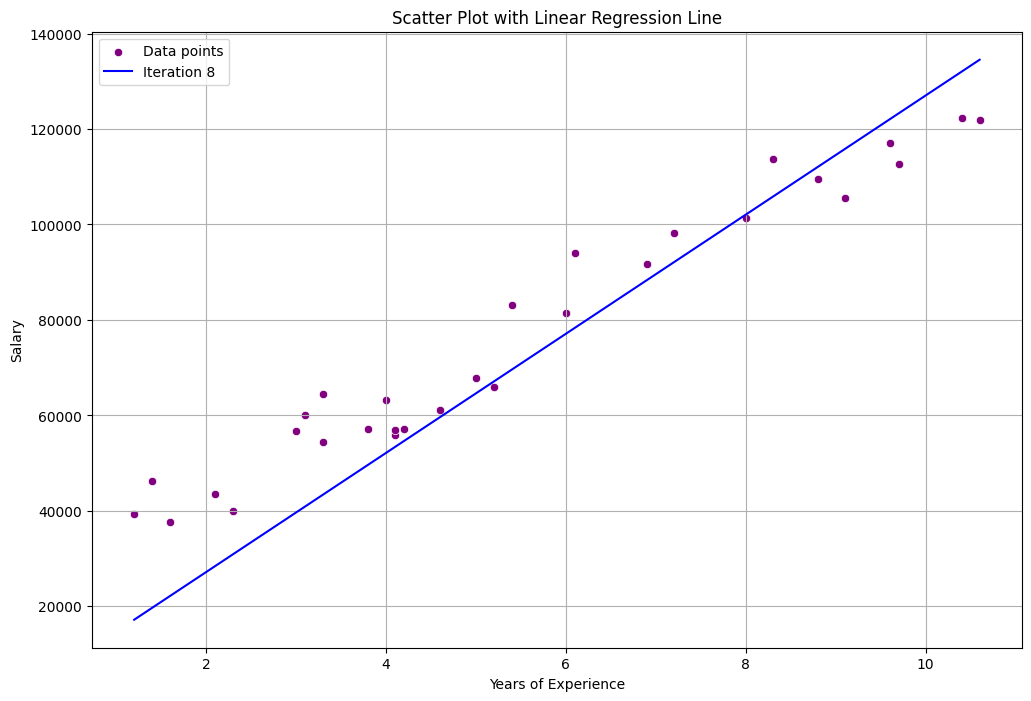

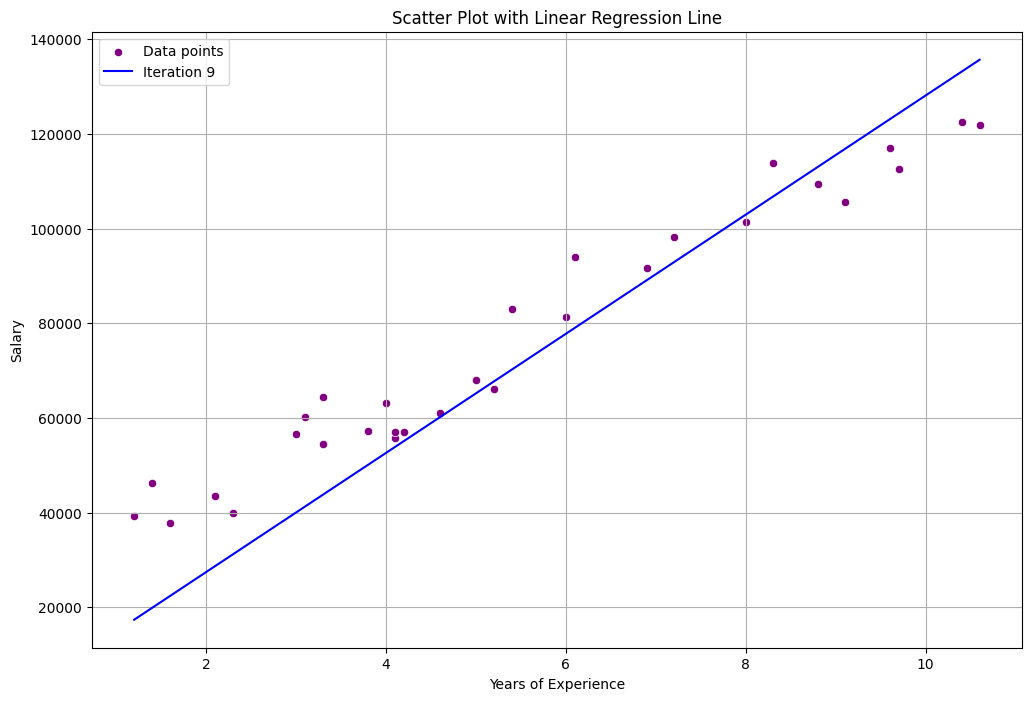

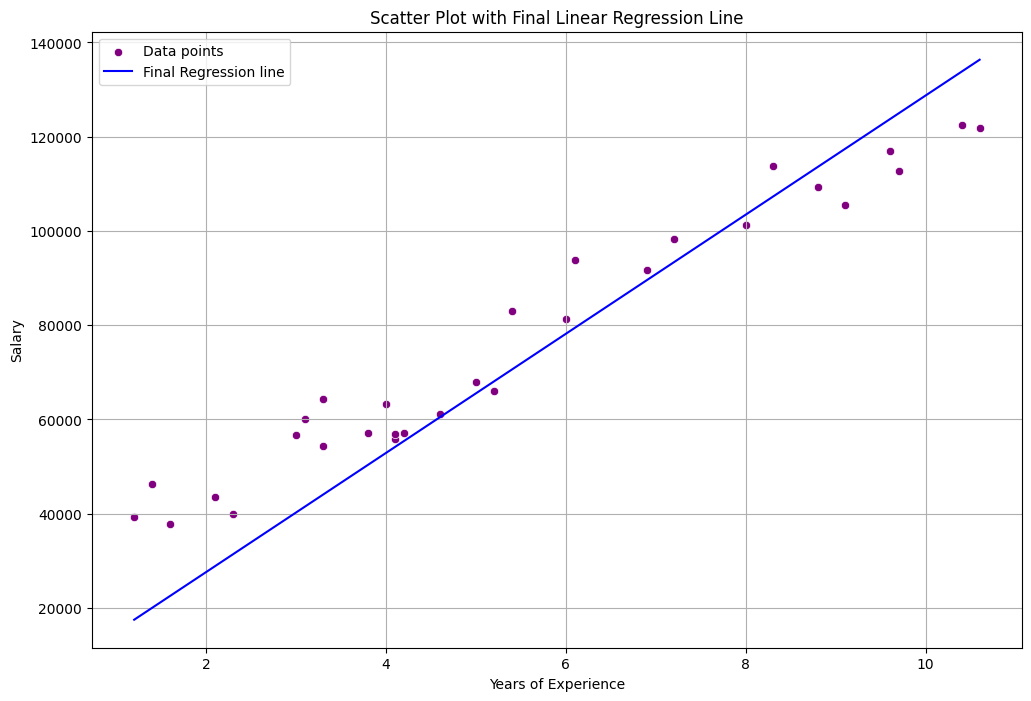

In [33]:
import csv
import numpy as np
import matplotlib.pyplot as plt

filename = '/Salary_dataset.csv'
years_experience = []
salaries = []

with open(filename, mode='r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    for row in csv_reader:
        years_experience.append(float(row[1]))
        salaries.append(float(row[2]))

X = np.array(years_experience)
y = np.array(salaries)

beta_0 = 0
beta_1 = 0

learning_rate = 0.01
num_iterations = 10

def compute_cost(X, y, beta_0, beta_1):
    n = len(y)
    y_pred = beta_0 + beta_1 * X
    cost = (1 / (2 * n)) * np.sum((y_pred - y) ** 2)
    return cost

def gradient_descent(X, y, beta_0, beta_1, learning_rate, num_iterations):
    n = len(y)
    cost_history = []

    for i in range(num_iterations):
        y_pred = beta_0 + beta_1 * X
        d_beta_0 = (1 / n) * np.sum(y_pred - y)
        d_beta_1 = (1 / n) * np.sum((y_pred - y) * X)
        beta_0 -= learning_rate * d_beta_0
        beta_1 -= learning_rate * d_beta_1
        cost = compute_cost(X, y, beta_0, beta_1)
        cost_history.append(cost)
        if i % 1 == 0:
            plt.figure(figsize=(12, 8))
            plt.scatter(X, y, color='purple', edgecolors='white', linewidth=0.5, label='Data points')
            plt.plot(X, y_pred, color='blue', label=f'Iteration {i}')
            plt.xlabel('Years of Experience')
            plt.ylabel('Salary')
            plt.title('Scatter Plot with Linear Regression Line')
            plt.grid(True)
            plt.legend()
            plt.show()

    return beta_0, beta_1, cost_history

beta_0, beta_1, cost_history = gradient_descent(X, y, beta_0, beta_1, learning_rate, num_iterations)

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='purple', edgecolors='white', linewidth=0.5, label='Data points')
plt.plot(X, beta_0 + beta_1 * X, color='blue', label='Final Regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot with Final Linear Regression Line')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import csv
import numpy as np

filename = '/Salary_dataset.csv'
years_experience = []
salaries = []

with open(filename, mode='r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    for row in csv_reader:
        years_experience.append(float(row[1]))
        salaries.append(float(row[2]))

X = np.array(years_experience)
y = np.array(salaries)

def compute_cost(X, y, beta_0, beta_1):
    n = len(y)
    y_pred = beta_0 + beta_1 * X
    cost = (1 / (2 * n)) * np.sum((y_pred - y) ** 2)
    return cost

def gradient_descent(X, y, beta_0, beta_1, learning_rate, num_iterations):
    n = len(y)
    cost_history = []

    for i in range(num_iterations):
        y_pred = beta_0 + beta_1 * X
        d_beta_0 = (1 / n) * np.sum(y_pred - y)
        d_beta_1 = (1 / n) * np.sum((y_pred - y) * X)
        beta_0 -= learning_rate * d_beta_0
        beta_1 -= learning_rate * d_beta_1
        cost = compute_cost(X, y, beta_0, beta_1)
        cost_history.append(cost)

    return beta_0, beta_1, cost_history

def predict_salary(beta_0, beta_1, years):
    return beta_0 + beta_1 * years

beta_0 = 0
beta_1 = 0

while True:
    years = input("Enter years of experience to predict salary (or type 'stop' to finish): ")
    if years.lower() == 'stop':
        break
    years = float(years)

    learning_rate = float(input("Enter the learning rate: "))
    num_iterations = int(input("Enter the number of iterations: "))

    beta_0, beta_1, cost_history = gradient_descent(X, y, beta_0, beta_1, learning_rate, num_iterations)

    predicted_salary = predict_salary(beta_0, beta_1, years)
    print(f"Predicted salary for {years:.0f} years of experience: {predicted_salary:.11f}")
    beta_0 = 0
    beta_1 = 0


print("Finished predictions.")
